<a href="https://colab.research.google.com/github/OtavioBer/ProjetoAplicadoI/blob/main/C%C3%B3digos/Projeto_Aplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto Aplicado I - Análise Exploratória de Dados

#<font color=blue>**TENDÊNCIAS DE COMPRAS EM SHOPPINGS DE ISTAMBUL**

CURSO: Tecnologia em Ciências de Dados

SEMESTRE: 2º

COMPONENTE CURRICULAR / TEMA: Projeto Aplicado I - TURMA 02A

NOME DO PROFESSOR: LEONARDO MASSAYUKI TAKUNO

INTEGRANTES E TIA:

1. Adrieli Machado Zaluski - 22503668
2. Caroline Ribeiro Ferreira - 22514635
3. Lais César Fonseca - 22500790
4. Liliane Gonçalves de Brito Ferraz - 22501142
5. Mucio Emanuel Feitosa Ferraz Filho	- 22515925
6. Otavio Bernardo Scandiuzzi - 22511921

<font color=blue>Objetivo do projeto

O propósito deste projeto é realizar um estudo de caso prático em uma base de dados pública, disponibilizada no site Kaggle¹. Os dados escolhidos para este estudo referem-se a compras em shoppings na cidade de Istambul, na Turquia.
Esses dados serão utilizados para identificar padrões no comportamento de compras e prever tendências futuras de consumo. Para este estudo de ciências de dados será utilizado técnicas adquiridas nos componentes curriculares de introdução a ciência de dados, pensamento computacional e análise exploratória de dados, com o objetivo principal de analisar e interpretar o que esses dados podem mostrar através de aplicação de medidas estatísticas, no qual discutiremos e responderemos algumas perguntas ao longo do projeto, permitindo uma compreensão mais profunda do comportamento dos consumidores em Istambul.


<font color=blue>Acessando o metadados

In [ ]:
#Informar o caminho do diretório onde consta o arquivo do metadados com informações de vendas dos shoppings
url = 'https://raw.githubusercontent.com/OtavioBer/ProjetoAplicadoI/main/Dados/Backup/Base_Keaggle_Original.csv'
df1 = pd.read_csv(url)
df1['shopping_mall'] = df1['shopping_mall'].str.strip().str.lower()
print(df1.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          kanyon  
1     Debit Card   12/12/2021  forum istanbul  
2           Cash    9/11/2021       metrocity  
3    Credit Card   16/05/2021    metropol avm  
4           Cash   24/10/2021          kanyon  


In [ ]:
#Informar o caminho do diretório onde consta o arquivo do metadados com distrito e região dos shoppings
url2 = 'https://raw.githubusercontent.com/OtavioBer/ProjetoAplicadoI/main/Dados/Base_Endereco.csv'
df2 = pd.read_csv(url2, sep=';')
df2['shopping_mall'] = df2['shopping_mall'].str.strip().str.lower()
print(df2.head())

       shopping_mall    Distrito    Regiao
0        cevahir avm       Sisli  Europeia
1  emaar square mall     Uskudar  Asiatica
2     forum istanbul  Bayrampasa  Europeia
3       istinye park     Sariyer  Europeia
4             kanyon       Sisli  Europeia


In [ ]:
#Cruzar as bases de dados para junção dos atributos distrito e região na base de dados de vendas.
df = pd.merge(df1, df2 [['shopping_mall', 'Distrito', 'Regiao' ]], on='shopping_mall', how='left')
print(df)

      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoic

#<font color=green>CONHECENDO O METADADOS

In [ ]:
#Conhecendo o "df" dataframe - metadados
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Distrito,Regiao,vendas,year_month,year,month,day_of_week,faixa_etaria
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,kanyon,Sisli,Europeia,7502.00,2022-08,2022,Aug,Fri,20-29
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,forum istanbul,Bayrampasa,Europeia,5401.53,2021-12,2021,Dec,Sun,20-29
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,metrocity,Besiktas,Europeia,300.08,2021-11,2021,Nov,Tue,20-29
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,metropol avm,Atasehir,Asiatica,15004.25,2021-05,2021,May,Sun,60-69
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,kanyon,Sisli,Europeia,242.40,2021-10,2021,Oct,Sun,50-59


In [ ]:
#Verificar quantidade de linhas e colunas do dataframe
df.shape

(99457, 18)

In [ ]:
#Verificar os atributos do dataframe
df.columns.to_list()

['invoice_no',
 'customer_id',
 'gender',
 'age',
 'category',
 'quantity',
 'price',
 'payment_method',
 'invoice_date',
 'shopping_mall',
 'Distrito',
 'Regiao',
 'vendas',
 'year_month',
 'year',
 'month',
 'day_of_week',
 'faixa_etaria']

In [ ]:
#Verificar os tipos dos atributos do dataframe
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
Distrito                  object
Regiao                    object
vendas                   float64
year_month             period[M]
year                      object
month                   category
day_of_week             category
faixa_etaria              object
dtype: object

In [ ]:
#Verificar informações estatísticas do dataframe
df.describe(include="all")

<ipython-input-25-125f210a9113>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Distrito,Regiao,vendas,year_month,year,month,day_of_week,faixa_etaria
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457,99457,99457,99457.000000,99457,99457,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10,8,2,NaN,27,3,12,7,6
top,I138884,C241288,Female,NaN,Clothing,NaN,NaN,Cash,2021-11-24 00:00:00,mall of istanbul,Sisli,Europeia,NaN,2021-07,2022,Jan,Mon,30-39
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943,24814,79571,NaN,3984,45551,11608,14383,19287
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN,NaN,NaN,2528.789268,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN,NaN,NaN,4222.475781,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN,NaN,NaN,5.230000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN,NaN,NaN,136.350000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificar valores únicos de cada atributo do dataframe
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
Distrito              8
Regiao                2
vendas               40
year_month           27
year                  3
month                12
day_of_week           7
faixa_etaria          6
dtype: int64

In [ ]:
#Verificar valores únicos de um atributo específico do dataframe (categoria)
df['category'].nunique()

8

#<font color=green>TRATAMENTO DOS DADOS

In [ ]:
#Importar bibliotecas necessárias para a exploração de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


Tratamento de dados para melhor exploração

In [ ]:
# converter tipo data da fatura para data
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
# criar novas colunas para ano_mês, ano, mês, dia da semana
df['year_month'] = df['invoice_date'].dt.to_period('M')
df['year'] = df['invoice_date'].dt.strftime('%Y')
df['month'] = df['invoice_date'].dt.strftime('%b')
df['day_of_week'] = df['invoice_date'].dt.strftime('%a')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Distrito,Regiao,vendas,year_month,year,month,day_of_week,faixa_etaria
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,kanyon,Sisli,Europeia,7502.00,2022-08,2022,Aug,Fri,20-29
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,forum istanbul,Bayrampasa,Europeia,5401.53,2021-12,2021,Dec,Sun,20-29
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,metrocity,Besiktas,Europeia,300.08,2021-11,2021,Nov,Tue,20-29
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,metropol avm,Atasehir,Asiatica,15004.25,2021-05,2021,May,Sun,60-69
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,kanyon,Sisli,Europeia,242.40,2021-10,2021,Oct,Sun,50-59


In [ ]:
# definir a ordem do mês
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = df['month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True))

# definir a ordem do dia da semana
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_week'] = df['day_of_week'].astype(pd.CategoricalDtype(categories=weekday_order, ordered=True))


In [ ]:
# criar novas colunas para o calculo de vendas
df['vendas'] = df['quantity'] * df['price']
df['vendas']

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: vendas, Length: 99457, dtype: float64

In [ ]:
# Exibir informações estatísticas sumarizadas dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.00,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.00,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.30,1200.32,5250.0
vendas,99457.0,2528.789268,4222.475781,5.23,136.35,600.17,2700.72,26250.0


In [ ]:
# Criar função para classificar a faixa etária
def faixa_etaria(age):
    if age <= 19:
        age = '18-19'
    elif 20 <= age <= 29:
        age = '20-29'
    elif 30 <= age <= 39:
        age = '30-39'
    elif 40 <= age <= 49:
        age = '40-49'
    elif 50 <= age <= 59:
        age = '50-59'
    else:
        age = '60-69'
    return age

# criar novas colunas para faixa etária
df['faixa_etaria'] = df['age'].apply(faixa_etaria)

df['faixa_etaria'].value_counts()

30-39    19287
20-29    19263
40-49    19153
60-69    19043
50-59    18931
18-19     3780
Name: faixa_etaria, dtype: int64

#<font color=green>ANÁLISE EXPLORATÓRIA DE DADOS


11.1.	O público feminino consome mais roupas que o masculino?

In [ ]:
#Número de mulheres que compram roupa
df.loc[(df['gender'] == 'Female') & (df['category'] == 'Clothing'), 'gender'].value_counts()

Female    20652
Name: gender, dtype: int64

In [ ]:
#Número de homens que compram roupa
df.loc[(df['gender'] == 'Male') & (df['category'] == 'Clothing'), 'gender'].value_counts()

Male    13835
Name: gender, dtype: int64

In [ ]:
#Quantidade de roupas por gênero
df[df['category'] == 'Clothing'].groupby(['gender', 'category'])['quantity'].agg(['sum'])

,,sum
gender,category,
Female,Clothing,62039
Male,Clothing,41519


In [ ]:
#Verificar o percentual de mulheres que consomem roupas.
print(f"Percentual de mulheres que consomem roupas é de {len(df[(df.gender == 'Female') & (df.category == 'Clothing') ])/ len(df) :.2f} %")

Percentual de mulheres que consomem roupas é de 0.21 %


In [ ]:
#Verificar o percentual de homens que consomem roupas.
print(f"Percentual de homens que consomem roupas é de { len(df[(df.gender == 'Male') & (df.category == 'Clothing') ])/ len(df) :.2f} %")

Percentual de homens que consomem roupas é de 0.14 %


In [ ]:
#Criar variavel de frequencia e percentual
frequencia = df['category'].value_counts()
percentual = df['category'].value_counts(normalize = True)*100

#Criar um dataframe com as variaveis criadas
dist_freq_qualitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual })
dist_freq_qualitativa.rename_axis('Produto', axis = 'columns', inplace = True)
#Identifacando o dataframe criado com as informações de frequência e percentual por gênero
dist_freq_qualitativa

Produto,Frequência,Porcentagem(%)
Clothing,34487,34.675287
Cosmetics,15097,15.179424
Food & Beverage,14776,14.856672
Toys,10087,10.142071
Shoes,10034,10.088782
Souvenir,4999,5.026293
Technology,4996,5.023276
Books,4981,5.008194


Gráfico

Comparação de consumo entre o público feminino e masculino:
Mulheres: Female    20652
Name: gender, dtype: int64
Homens: Male    13835
Name: gender, dtype: int64


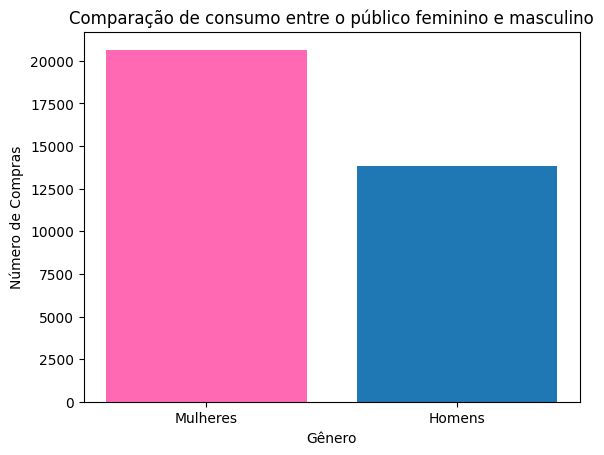

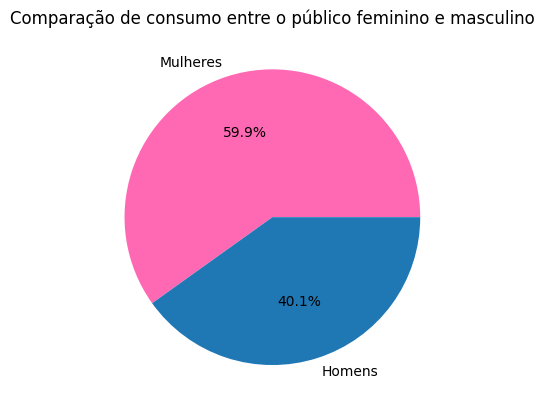

In [ ]:
# Calcular o número de mulheres que compram roupa
mulheres = df.loc[(df['gender'] == 'Female') & (df['category'] == 'Clothing'), 'gender'].value_counts()

# Calcular o número de homens que compram roupa
homens = df.loc[(df['gender'] == 'Male') & (df['category'] == 'Clothing'), 'gender'].value_counts()

# Mostrar a comparação de consumo entre o público feminino e masculino
print("Comparação de consumo entre o público feminino e masculino:")
print("Mulheres:", mulheres)
print("Homens:", homens)

# Criar um DataFrame com os dados da comparação
dados = pd.DataFrame({'Gênero': ['Mulheres', 'Homens'],
                      'Número de Compras': [mulheres[0], homens[0]]})

# Definir as cores para mulheres e homens
cores = ['#FF69B4', '#1F77B4']

# Plotar o gráfico de barras
plt.bar(dados['Gênero'], dados['Número de Compras'], color=cores)
plt.title('Comparação de consumo entre o público feminino e masculino')
plt.xlabel('Gênero')
plt.ylabel('Número de Compras')
plt.show()

# Plotar o gráfico de pizza
plt.pie(dados['Número de Compras'], labels=dados['Gênero'], colors=cores, autopct='%1.1f%%')
plt.title('Comparação de consumo entre o público feminino e masculino')
plt.show()


Análise:
Podemos observar a predominância no consumo do público feminino no consumo em shoppings em Istambull, sendo 59.9% das vendas para o público feminino, contra 40,1% para o público masculino.

11.2.	Quais produtos são mais consumidos por gênero?

In [ ]:
#Quantidade de produtos por categoria e gênero
df.groupby(['gender','category'])['quantity'].agg(['sum'])

sum
gender category              
Female Books             8776
       Clothing         62039
       Cosmetics        27261
       Food & Beverage  26362
       Shoes            17906
       Souvenir          8976
       Technology        8977
       Toys             18362
Male   Books             6206
       Clothing         41519
       Cosmetics        18204
       Food & Beverage  17915
       Shoes            12311
       Souvenir          5895
       Technology        6044
       Toys             11959

In [ ]:
#Valor das vendas de produtos por categoria e gênero
df.groupby(['gender','category'])['vendas'].agg(['sum'])

sum
gender category                    
Female Books              489314.70
       Clothing         68251695.60
       Cosmetics         4066772.54
       Food & Beverage    505322.60
       Shoes            39425167.30
       Souvenir           382867.20
       Technology       34669950.00
       Toys              2416046.08
Male   Books              345238.20
       Clothing         45745095.44
       Cosmetics         2726090.36
       Food & Beverage    344212.45
       Shoes            27128284.17
       Souvenir           252957.45
       Technology       23192400.00
       Toys              1564380.16

11.3.	Qual o ranking de produtos mais consumidos pelo público em geral?

In [ ]:
#Contagem de produtos.
df.category.value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [ ]:
#Quantidade dos produtos mais consumidos pelo público geral
df.groupby(['category'])['quantity'].agg(['sum'])

,sum
category,
Books,14982
Clothing,103558
Cosmetics,45465
Food & Beverage,44277
Shoes,30217
Souvenir,14871
Technology,15021
Toys,30321


In [ ]:
#Valor das vendas dos produtos mais consumidos pelo público geral
df.groupby(['category'])['vendas'].agg(['sum']).round(2).astype(str)

,sum
category,
Books,834552.9
Clothing,113996791.04
Cosmetics,6792862.9
Food & Beverage,849535.05
Shoes,66553451.47
Souvenir,635824.65
Technology,57862350.0
Toys,3980426.24


Gráfico

Ranking de produtos mais consumidos pelo público em geral:
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64


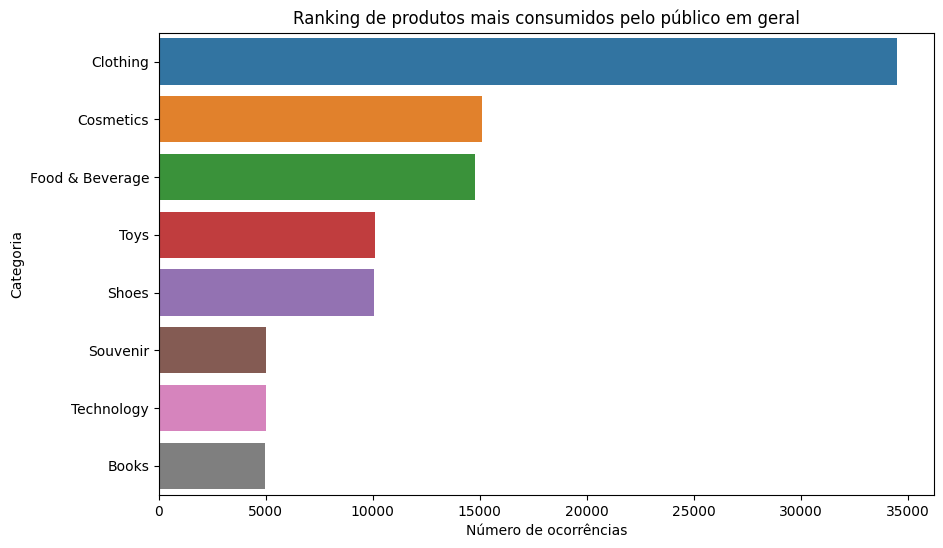

In [ ]:
# Obter o ranking de produtos mais consumidos pelo público geral
ranking_produtos = df['category'].value_counts().sort_values(ascending=False)

# Exibir o ranking
print("Ranking de produtos mais consumidos pelo público em geral:")
print(ranking_produtos)

# Criar uma visualização gráfica
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order=ranking_produtos.index)
plt.title('Ranking de produtos mais consumidos pelo público em geral')
plt.xlabel('Número de ocorrências')
plt.ylabel('Categoria')
plt.show()


Análise: A venda de roupas é o segmento líder, com uma quantidade significativamente maior de vendas em comparação aos outros produtos listados. Isso indica uma demanda forte por roupas entre os consumidores de shoppings em Istambul. Compondo o top 3 seguem as vendas de Cosméticos e Comidas e Bebidas que possuem uma pequena diferença de 321 de ocorrência entre esses dois setores, ficando quase empatados.

11.4.	Qual a forma de pagamento mais utilizada por faixa etária e por gênero?

In [ ]:
#Pesquisar a quantidade de tipos de pagamentos
df['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [ ]:
#Valor das vendas por tipo de pagamento
df.groupby(['payment_method'])['vendas'].agg(['sum']).round(2).astype(str)

,sum
payment_method,
Cash,112832243.02
Credit Card,88077123.77
Debit Card,50596427.46


In [ ]:
#agrupar por faixa etária e gênero
grouped = df.groupby(['gender', pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                      labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])])
#calcular a forma de pagamento mais comum em cada grupo
result = grouped['payment_method'].agg(pd.Series.mode)

#imprimir o resultado
print(result)

gender  age  
Female  0-20     Cash
        21-30    Cash
        31-40    Cash
        41-50    Cash
        51-60    Cash
        60+      Cash
Male    0-20     Cash
        21-30    Cash
        31-40    Cash
        41-50    Cash
        51-60    Cash
        60+      Cash
Name: payment_method, dtype: object


In [ ]:
#Verificar a quantidade de consumo por gênero e método de pagamento
df.groupby(['gender','payment_method'])['quantity'].agg(['sum'])

sum
gender payment_method       
Female Cash            79498
       Credit Card     63291
       Debit Card      35870
Male   Cash            53872
       Credit Card     41754
       Debit Card      24427

In [ ]:
#Verificar as vendas por gênero e método de pagamento
df.groupby(['gender','payment_method'])['vendas'].agg(['sum'])

sum
gender payment_method             
Female Cash            67573638.45
       Credit Card     52875809.90
       Debit Card      29757687.67
Male   Cash            45258604.57
       Credit Card     35201313.87
       Debit Card      20838739.79

In [ ]:
#Verificar a quantidade de consumo por faixa etária e método de pagamento
df.groupby(['faixa_etaria','payment_method'])['quantity'].agg(['sum'])

sum
faixa_etaria payment_method       
18-19        Cash             4893
             Credit Card      4134
             Debit Card       2269
20-29        Cash            26057
             Credit Card     20071
             Debit Card      11821
30-39        Cash            25731
             Credit Card     20511
             Debit Card      11633
40-49        Cash            25587
             Credit Card     20204
             Debit Card      11726
50-59        Cash            25351
             Credit Card     19981
             Debit Card      11590
60-69        Cash            25751
             Credit Card     20144
             Debit Card      11258

In [ ]:
#Verificar a quantidade de consumo por gênero, faixa etária e método de pagamento
df.groupby(['gender', 'faixa_etaria','payment_method'])['quantity'].agg(['sum'])

sum
gender faixa_etaria payment_method       
Female 18-19        Cash             2905
                    Credit Card      2501
                    Debit Card       1298
       20-29        Cash            15442
                    Credit Card     12176
                    Debit Card       7159
       30-39        Cash            15379
                    Credit Card     12356
                    Debit Card       6933
       40-49        Cash            15214
                    Credit Card     12281
                    Debit Card       6915
       50-59        Cash            15049
                    Credit Card     12022
                    Debit Card       6808
       60-69        Cash            15509
                    Credit Card     11955
                    Debit Card       6757
Male   18-19        Cash             1988
                    Credit Card      1633
                    Debit Card        971
       20-29        Cash            10615
                    Credit Card      7895
                    Debit Card       4662
       30-39        Cash            10352
                    Credit Card      8155
                    Debit Card       4700
       40-49        Cash            10373
                    Credit Card      7923
                    Debit Card       4811
       50-59        Cash            10302
                    Credit Card      7959
                    Debit Card       4782
       60-69        Cash            10242
                    Credit Card      8189
                    Debit Card       4501

Gráfico

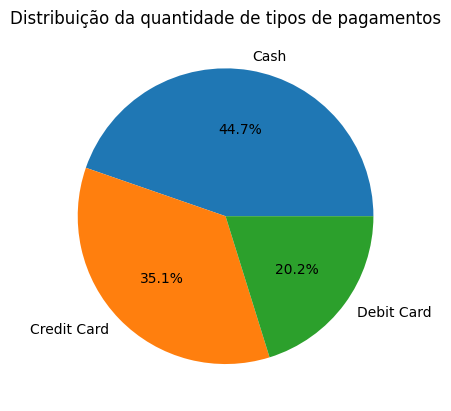

In [ ]:
# Contagem dos tipos de pagamentos
pagamentos = df['payment_method'].value_counts()

# Criar gráfico de pizza
fig, ax = plt.subplots()
ax.pie(pagamentos, labels=pagamentos.index, autopct='%1.1f%%')
ax.set_title('Distribuição da quantidade de tipos de pagamentos')

plt.show()

11.5.	Qual a sazonalidade (dia da semana) de consumo com maior volume de compras?

In [ ]:
#Transformar a coluna invoice_date em um objeto datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
#Criar uma nova coluna para o dia da semana correspondente a cada data
df['day_of_week'] = df['invoice_date'].dt.day_name()
#Agrupar os dados por dia da semana e somar as quantidades compradas para cada dia
day_of_week_sales = df.groupby('day_of_week')['quantity'].sum()
#Classificar os dados em ordem decrescente de quantidade
day_of_week_sales_sorted = day_of_week_sales.sort_values(ascending=False)
#Visualizar as cinco primeiras linhas da série com as vendas por dia da semana
print(day_of_week_sales_sorted.head())

day_of_week
Monday       43568
Friday       43075
Tuesday      42822
Thursday     42469
Wednesday    42443
Name: quantity, dtype: int64


In [ ]:
#Verificar a quantidade de consumo por dia da semana
df.groupby(['day_of_week'])['quantity'].agg(['sum'])

,sum
day_of_week,
Friday,43075
Monday,43568
Saturday,42156
Sunday,42179
Thursday,42469
Tuesday,42822
Wednesday,42443


In [ ]:
#Verificar o valor das vendas por dia da semana
df.groupby(['day_of_week'])['vendas'].agg(['sum'])

,sum
day_of_week,
Friday,35728331.39
Monday,37296648.11
Saturday,35179828.72
Sunday,35689090.61
Thursday,35738148.63
Tuesday,36298096.66
Wednesday,35575650.13


In [ ]:
#Verificar o valor das vendas por mês e ano
df.groupby(['year_month'])['vendas'].agg(['sum'])

,sum
year_month,
2021-01,9641614.62
2021-02,8772315.22
2021-03,9455359.38
2021-04,9389541.54
2021-05,9771756.97
2021-06,9286271.35
2021-07,10311119.68
2021-08,9630655.70
2021-09,9188165.62


Gráfico

<ipython-input-67-dbbd36c49c5a>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_vendas_agrupado = df.groupby(pd.Grouper(key='invoice_date', freq='MS')).sum()


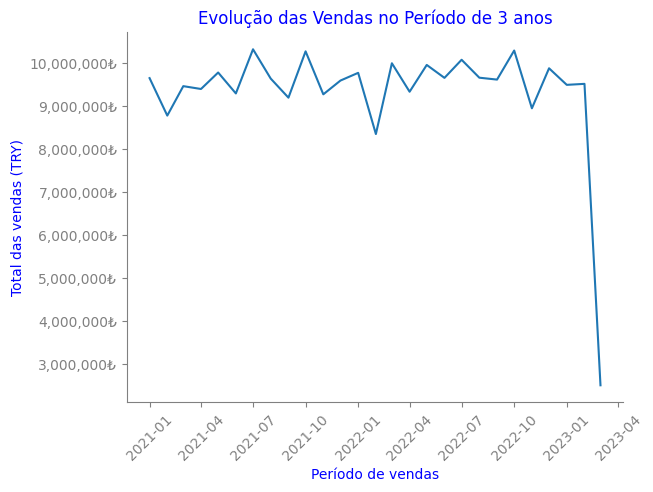

In [ ]:
# Converter a coluna 'Data' para o tipo datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Agrupar as vendas por mês e calcular a soma das vendas em cada mês
dados_vendas_agrupado = df.groupby(pd.Grouper(key='invoice_date', freq='MS')).sum()

# Plotar o gráfico de linha
plt.plot(dados_vendas_agrupado.index, dados_vendas_agrupado['vendas'])

# Definir rótulos dos eixos x e y
plt.xlabel('Período de vendas', color='blue')
plt.ylabel('Total das vendas (TRY)', color='blue')

# Definir título do gráfico
plt.title('Evolução das Vendas no Período de 3 anos', color='blue')

# Formatar o eixo y com o símbolo de moeda turca
fmt = '{x:,.0f}₺'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Formatar a cor da linha do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Definir cor dos rótulos do eixo x e y
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

Gráfico

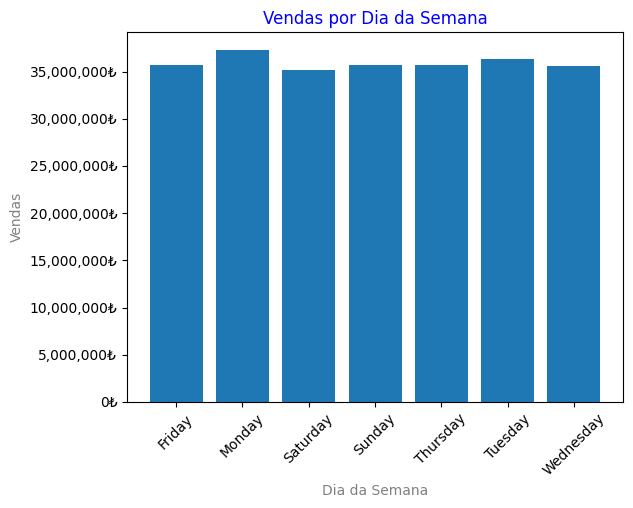

In [ ]:
# Agrupar as vendas por dia da semana e calcular a soma
vendas_por_dia = df.groupby('day_of_week')['vendas'].sum()

# Obter os dias da semana como índice
dias_semana = vendas_por_dia.index

# Obter os valores das vendas
total_vendas = vendas_por_dia.values

# Formatar o eixo y com o símbolo de moeda turca
fmt = '{x:,.0f}₺'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.bar(dias_semana, total_vendas)
plt.xlabel('Dia da Semana', color='gray')
plt.ylabel('Vendas', color='gray')
plt.title('Vendas por Dia da Semana', color='blue')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

plt.show()

11.6.	Qual a média de consumo anual por gênero e faixa etária?

In [ ]:
#Média de idade por gênero
df.groupby('gender')['age'].mean()

gender
Female    43.453515
Male      43.387767
Name: age, dtype: float64

In [ ]:
#Média de quantidade por gênero
df.groupby('gender')['quantity'].mean()

gender
Female    3.003581
Male      3.003202
Name: quantity, dtype: float64

In [ ]:
#Média de consumo por gênero
df.groupby('gender')['vendas'].mean()

gender
Female    2525.253623
Male      2534.050237
Name: vendas, dtype: float64

In [ ]:
#Média de consumo de protudos por gênero
df.groupby(['gender', 'category'])['vendas'].agg(['mean'])

mean
gender category                     
Female Books              168.380833
       Clothing          3304.846775
       Cosmetics          448.376245
       Food & Beverage     57.396933
       Shoes             6607.200821
       Souvenir           126.903281
       Technology       11630.308621
       Toys               397.049479
Male   Books              166.379855
       Clothing          3306.475999
       Cosmetics          452.312985
       Food & Beverage     57.637718
       Shoes             6670.342801
       Souvenir           127.627371
       Technology       11509.875931
       Toys               390.899590

In [ ]:
#Quantidade vendidas por produto
df.groupby('category')['quantity'].agg(['sum'])

,sum
category,
Books,14982
Clothing,103558
Cosmetics,45465
Food & Beverage,44277
Shoes,30217
Souvenir,14871
Technology,15021
Toys,30321


In [ ]:
#Pesquisar por ano, a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo anual.
df.groupby('year')['vendas'].agg(['sum' , 'mean' , 'std', 'min', 'max']).round(2).astype(str)

,sum,mean,std,min,max
year,,,,,
2021,114560570.59,2524.36,4190.35,5.23,26250.0
2022,115436814.08,2534.23,4247.05,5.23,26250.0
2023,21508409.58,2523.28,4261.4,5.23,26250.0


In [ ]:
#Pesquisar por genêro, a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo.
df.groupby('gender')['vendas'].agg(['sum' , 'mean' , 'std', 'min', 'max']).round(2).astype(str)

,sum,mean,std,min,max
gender,,,,,
Female,150207136.02,2525.25,4226.62,5.23,26250.0
Male,101298658.23,2534.05,4216.35,5.23,26250.0


In [ ]:
#Pesquisar por faixa etária, a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo.
df.groupby('faixa_etaria')['vendas'].agg(['sum' , 'mean' , 'std', 'min', 'max']).round(2)

,sum,mean,std,min,max
faixa_etaria,,,,,
18-19,9051058.89,2394.46,3933.41,5.23,26250.0
20-29,49044390.58,2546.04,4233.48,5.23,26250.0
30-39,48288158.82,2503.66,4211.54,5.23,26250.0
40-49,49234368.09,2570.58,4270.17,5.23,26250.0
50-59,47593634.14,2514.06,4209.57,5.23,26250.0
60-69,48294183.73,2536.06,4242.10,5.23,26250.0


In [ ]:
#Pesquisar por ano, genêro e faixa etária, a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo.
display(df.groupby(['year', 'gender' , 'faixa_etaria' ])['vendas'].agg(['sum' , 'mean' , 'std', 'min', 'max']))

sum         mean          std   min      max
year gender faixa_etaria                                                      
2021 Female 18-19          2306920.67  2330.222899  3719.284113  5.23  26250.0
            20-29         13530368.54  2585.091429  4250.956500  5.23  26250.0
            30-39         13476015.79  2524.071135  4227.367575  5.23  26250.0
            40-49         13090046.98  2508.632997  4118.458788  5.23  26250.0
            50-59         12696598.12  2489.040996  4176.430925  5.23  26250.0
            60-69         13294464.56  2520.755510  4230.522340  5.23  26250.0
     Male   18-19          1656475.06  2379.992902  3982.126216  5.23  26250.0
            20-29          9108870.95  2570.223180  4292.467916  5.23  26250.0
            30-39          8848473.64  2561.063282  4200.133165  5.23  26250.0
            40-49          8865381.58  2522.874667  4192.526985  5.23  26250.0
            50-59          8911362.64  2503.895094  4183.215807  5.23  26250.0
            60-69          8775592.06  2537.765200  4167.888491  5.23  26250.0
2022 Female 18-19          2687785.25  2589.388487  4191.642534  5.23  26250.0
            20-29         13576974.00  2558.796457  4264.920137  5.23  26250.0
            30-39         13321867.26  2544.769295  4312.201480  5.23  26250.0
            40-49         13510577.77  2565.624339  4317.533338  5.23  26250.0
            50-59         13174306.02  2525.264715  4236.111627  5.23  26250.0
            60-69         12788365.93  2492.858856  4163.216320  5.23  26250.0
     Male   18-19          1694387.86  2314.737514  3890.737687  5.23  26250.0
            20-29          8567587.80  2445.087842  4091.969878  5.23  26250.0
            30-39          8821034.90  2425.360159  4119.348596  5.23  26250.0
            40-49          9370266.83  2695.703921  4433.177209  5.23  26250.0
            50-59          8784787.59  2534.560759  4208.947523  5.23  26250.0
            60-69          9138872.87  2578.688733  4368.028710  5.23  26250.0
2023 Female 18-19           435305.47  2365.790598  4056.051280  5.23  26250.0
            20-29          2473206.67  2536.622226  4454.813459  5.23  26250.0
            30-39          2176319.79  2295.695981  3934.316355  5.23  26250.0
            40-49          2476828.63  2395.385522  4208.280035  5.23  26250.0
            50-59          2505543.84  2523.206284  4370.130430  5.23  26250.0
            60-69          2685640.73  2685.640730  4476.432918  5.23  26250.0
     Male   18-19           270184.58  1929.889857  3163.342240  5.23  16800.0
            20-29          1787382.62  2553.403743  3939.776462  5.23  26250.0
            30-39          1644447.44  2443.458306  4221.937467  5.23  26250.0
            40-49          1921266.30  2978.707442  4667.627627  5.23  26250.0
            50-59          1521035.93  2556.362908  4162.913375  5.23  26250.0
            60-69          1611247.58  2529.431052  4286.915078  5.23  26250.0

11.7.	Qual shopping possui o maior ticket médio de compras?

In [ ]:
#Pesquisar por shopping a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo.
display(df.groupby(['shopping_mall' ])['vendas'].agg(['sum' , 'mean' , 'std', 'min', 'max']))

,sum,mean,std,min,max
shopping_mall,,,,,
cevahir avm,12645138.20,2533.588099,4286.775361,5.23,26250.0
emaar square mall,12406100.29,2578.694718,4298.655654,5.23,26250.0
forum istanbul,12303921.24,2487.148017,4102.094184,5.23,26250.0
istinye park,24618827.68,2517.005181,4157.030090,5.23,26250.0
kanyon,50554231.10,2550.281547,4298.927412,5.23,26250.0
mall of istanbul,50872481.68,2550.894132,4246.980030,5.23,26250.0
metrocity,37302787.33,2485.030133,4147.375439,5.23,26250.0
metropol avm,25379913.19,2497.777108,4130.150742,5.23,26250.0
viaport outlet,12521339.72,2548.095181,4288.718358,5.23,26250.0


In [ ]:
#Média de consumo geral
media_geral = df['vendas'].mean()
media_geral

2528.78926822647

In [ ]:
#Agrupar os dados por shopping
agrupar_df = df.groupby('shopping_mall')['vendas'].mean().reset_index()
agrupar_df

,shopping_mall,vendas
0,cevahir avm,2533.588099
1,emaar square mall,2578.694718
2,forum istanbul,2487.148017
3,istinye park,2517.005181
4,kanyon,2550.281547
5,mall of istanbul,2550.894132
6,metrocity,2485.030133
7,metropol avm,2497.777108
8,viaport outlet,2548.095181
9,zorlu center,2542.079570


Gráfico

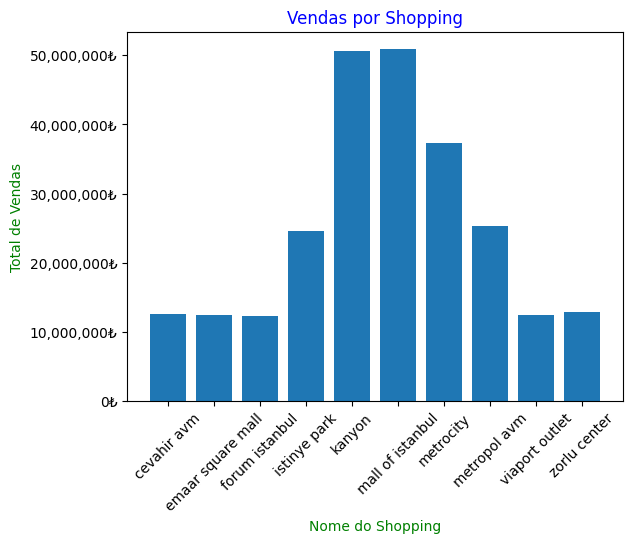

In [ ]:
# Agrupar as vendas por shopping e calcular a soma
vendas_shopping = df.groupby('shopping_mall')['vendas'].sum()

# Obter os dias da semana como índice
shopping = vendas_shopping.index

# Obter os valores das vendas
total_vendas_shop = vendas_shopping.values

# Formatar o eixo y com o símbolo de moeda turca
fmt = '{x:,.0f}₺'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.bar(shopping, total_vendas_shop)
plt.xlabel('Nome do Shopping', color='green')
plt.ylabel('Total de Vendas', color='green')
plt.title('Vendas por Shopping', color='blue')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Calcular a diferença da média geral em relação a média de cada shopping
diferenca_media = agrupar_df['vendas'] - media_geral
diferenca_media 

0     4.798830
1    49.905450
2   -41.641251
3   -11.784087
4    21.492278
5    22.104864
6   -43.759135
7   -31.012161
8    19.305913
9    13.290302
Name: vendas, dtype: float64

In [ ]:
#Verificar qual shopping tem a média superior a média geral.
max_shopping = agrupar_df.loc[diferenca_media.idxmax(), 'shopping_mall']
print("O shopping que possui o maior ticket médio de compras é:", max_shopping)

O shopping que possui o maior ticket médio de compras é: emaar square mall


In [ ]:
#Qual a média de consumo anual por gênero e faixa etária?
df.groupby(['year', 'gender' , 'faixa_etaria' ])['vendas'].mean()

year  gender  faixa_etaria
2021  Female  18-19           2330.222899
              20-29           2585.091429
              30-39           2524.071135
              40-49           2508.632997
              50-59           2489.040996
              60-69           2520.755510
      Male    18-19           2379.992902
              20-29           2570.223180
              30-39           2561.063282
              40-49           2522.874667
              50-59           2503.895094
              60-69           2537.765200
2022  Female  18-19           2589.388487
              20-29           2558.796457
              30-39           2544.769295
              40-49           2565.624339
              50-59           2525.264715
              60-69           2492.858856
      Male    18-19           2314.737514
              20-29           2445.087842
              30-39           2425.360159
              40-49           2695.703921
              50-59           2534.560759
       

In [ ]:
#Qual a média de consumo por faixa etária?
df.groupby('faixa_etaria')['vendas'].mean()

faixa_etaria
18-19    2394.460024
20-29    2546.041145
30-39    2503.663546
40-49    2570.582577
50-59    2514.058113
60-69    2536.059640
Name: vendas, dtype: float64

In [ ]:
#Qual a média de consumo por produto?
df.groupby('category')['vendas'].mean()

category
Books                167.547260
Clothing            3305.500364
Cosmetics            449.947864
Food & Beverage       57.494251
Shoes               6632.793649
Souvenir             127.190368
Technology         11581.735388
Toys                 394.609521
Name: vendas, dtype: float64

In [ ]:
#Quantidade de tipo de pagamento e gênero
df.groupby('payment_method')['gender'].value_counts()

payment_method  gender
Cash            Female    26509
                Male      17938
Credit Card     Female    21011
                Male      13920
Debit Card      Female    11962
                Male       8117
Name: gender, dtype: int64

11.8.	Como se dá a comparação de gastos totais por gênero e por faixa etária? E dos gastos médios?

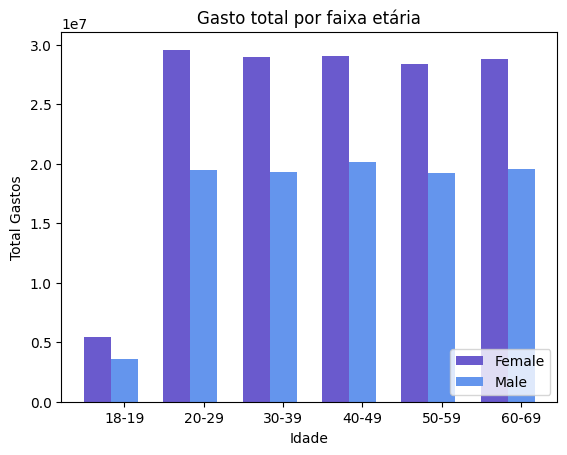

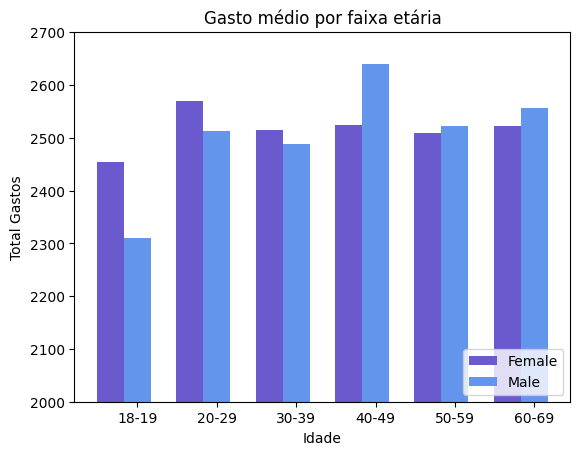

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#criando uma nova coluna na tabela
df2 = df
df2['consumption'] = df2['price']*df2['quantity']

df3 = df2
df3['age_group'] = 0

def age_group(age):
  
    if age <= 19:
        age = '18-19'
    elif 20 <= age <= 29:
        age = '20-29'
    elif 30 <= age <= 39:
        age = '30-39'
    elif 40 <= age <= 49:
        age = '40-49'
    elif 50 <= age <= 59:
        age = '50-59'
    else:
        age = '60-69'
    return age

# criar novas colunas para age_group
df3['age_group'] = df3['age'].apply(age_group)
df3['age_group'].value_counts()

#agrupando e verificando a soma e a média
df4 = df3.groupby(['gender','age_group'])['consumption'].agg(['sum', 'mean'])
df4 = df4.sort_values(['gender'], ascending=True)
df4 = df4.reset_index()
df4

#montagem de filtros
filt = (df4['gender'] == 'Female')
filtro = (df4['gender'] == 'Male')

df5 = df4[filt]
df6 = df4[filtro]

#criação da primeira tabela 
n1 = list(df5['sum'])
n2 = list(df6['sum'])
barWidth = 0.34

r1 = np.arange(len(n1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, n1, color='#6A5ACD', width = barWidth, label='Female')
plt.bar(r2, n2, color='#6495ED', width = barWidth, label='Male')

plt.xlabel('Idade')
plt.xticks([r + barWidth for r in range(len(n1))], list(df5['age_group']))
plt.ylabel('Total Gastos')
plt.title('Gasto total por faixa etária')

plt.legend(loc='lower right')
plt.show()

#criação da segunda tabela 
m1 = list(df5['mean'])
m2 = list(df6['mean'])
barWidth = 0.34

s1 = np.arange(len(m1))
s2 = [x + barWidth for x in r1]

#criação da segunda tabela 
plt.bar(s1, m1, color='#6A5ACD', width = barWidth, label='Female')
plt.bar(s2, m2, color='#6495ED', width = barWidth, label='Male')

plt.xlabel('Idade')
plt.xticks([r + barWidth for r in range(len(n1))], list(df5['age_group']))
plt.ylabel('Total Gastos')
plt.title('Gasto médio por faixa etária')
plt.ylim([2000, 2700])

plt.legend(loc='lower right')
plt.show()


Análise: Através dos gráficos abaixo fica perceptível o grande volume de compras realizadas em shoppings centers de Istambul, porém o gráfico da soma total por gênero e idade não nos traz uma ideia clara dos gastos por cada um desses grupos, enquanto o gráfico dos gastos médios nos indica uma proporção mais realística dos grupos que mais e menos gastaram.

11.9.	Qual faixa etária mais consome artigos de leitura?

In [ ]:
df2 = df.groupby('category')['quantity'].agg([sum])
df2 = df2.sort_values(['sum'], ascending=False)
df2

df3 = df
df3['age_group'] = 0
df3

def age_group(age):

    if age <= 19:
        age = '18-19'
    elif 20 <= age <= 29:
        age = '20-29'
    elif 30 <= age <= 39:
        age = '30-39'
    elif 40 <= age <= 49:
        age = '40-49'
    elif 50 <= age <= 59:
        age = '50-59'
    else:
        age = '60-69'
    return age

# criar novas colunas para age_group
df3['age_group'] = df3['age'].apply(age_group)

df3['age_group'].value_counts()

#Agrupando por categoría, faixa etária e quantidade consumida 
df2 = df3.groupby(['category', 'age_group'])['quantity'].agg([sum])
df2 = df2.sort_values(['category'], ascending=True)
df2 = df2.reset_index()
df2

#filtrando apenas artigos de leitura
filt = (df2['category'] == 'Books')
df4 = df2[filt]
df4 = df4.sort_values(['sum'], ascending=False)
df4

mv = (df4['sum'] == df4['sum'].max())
df5 = df4[mv]
mv2 = list(df5['age_group'])
cat_max = mv2[0]

#Obtendo a resposta:
print('A faixa etária que mais consome artigos de leitura é:', cat_max)

A faixa etária que mais consome artigos de leitura é: 20-29


11.10.	Qual a localidade de shopping tem o maior consumo por categoria?

In [ ]:
# Agrupar o DataFrame por "region" e "category"
grupo = df.groupby(['Regiao', 'category'])

# Calcular o total de vendas para cada categoria e shopping_mall
total_vendas = grupo['vendas'].sum()

# Transformar a série resultante em um DataFrame e ordenar em ordem decrescente de vendas
total_vendas_df = total_vendas.reset_index().sort_values(by=['category','vendas'], ascending=[True, False])

# Selecionar a primeira linha do DataFrame resultante para cada categoria, que terá a localidade de shopping com o maior consumo por categoria
maior_consumo = total_vendas_df.drop_duplicates(subset='category', keep='first')

# Imprimir o resultado
print("Localidade de shopping com o maior consumo por categoria:")
print(maior_consumo[['category','Regiao', 'vendas']])


Localidade de shopping com o maior consumo por categoria:
           category    Regiao       vendas
8             Books  Europeia    669205.80
9          Clothing  Europeia  91233622.48
10        Cosmetics  Europeia   5425711.06
11  Food & Beverage  Europeia    678623.88
12            Shoes  Europeia  53119246.19
13         Souvenir  Europeia    509691.96
14       Technology  Europeia  46374300.00
15             Toys  Europeia   3188039.68


In [ ]:
#Pesquisar por Região, a soma, a média, o desvio padrão, valor mínimo e o valor máximo de consumo.
df.groupby('Regiao')['quantity'].agg(['sum' , 'mean' , 'std', 'min', 'max'])

,sum,mean,std,min,max
Regiao,,,,,
Asiatica,59747,3.004476,1.413904,1,5
Europeia,238965,3.003167,1.412814,1,5


In [ ]:
#Verificar a quantidade por Distrito
df.groupby('Distrito')['quantity'].agg(['sum'])

,sum
Distrito,
Atasehir,30530
Bayrampasa,14852
Besiktas,60128
Ikitelli,60114
Pendik,14716
Sariyer,29465
Sisli,74406
Uskudar,14501


In [ ]:
#Verificar as vendas por Região e Distrito
df.groupby(['Regiao', 'Distrito'])['vendas'].agg(['sum'])

sum
Regiao   Distrito               
Asiatica Atasehir    25379913.19
         Pendik      12521339.72
         Uskudar     12406100.29
Europeia Bayrampasa  12303921.24
         Besiktas    50203841.15
         Ikitelli    50872481.68
         Sariyer     24618827.68
         Sisli       63199369.30

11.11.	Qual produto tem o maior e menor ticket médio por região?

In [ ]:
# Agrupamos o DataFrame por "region" e "category"
grupo = df.groupby(['Regiao', 'category'])

# Calcular o ticket médio para cada categoria e região
ticket_medio = grupo['vendas'].mean()

# Transformar a série resultante em um DataFrame e ordenar em ordem decrescente de ticket médio
ticket_medio_df = ticket_medio.reset_index().sort_values(by=['Regiao', 'vendas'], ascending=[True, False])

# Selecionar a primeira e a última linha do DataFrame resultante para cada região, que terá o produto com o maior e menor ticket médio por região, respectivamente
maior_ticket_medio = ticket_medio_df.drop_duplicates(subset='Regiao', keep='first')
menor_ticket_medio = ticket_medio_df.drop_duplicates(subset='Regiao', keep='last')

# Imprimir o resultado
print("Produto com o maior ticket médio por região:")
print(maior_ticket_medio[['Regiao', 'category', 'vendas']])
print()
print("Produto com o menor ticket médio por região:")
print(menor_ticket_medio[['Regiao', 'category', 'vendas']])

Produto com o maior ticket médio por região:
      Regiao    category        vendas
6   Asiatica  Technology  11686.724313
14  Europeia  Technology  11556.017942

Produto com o menor ticket médio por região:
      Regiao         category     vendas
3   Asiatica  Food & Beverage  58.093532
11  Europeia  Food & Beverage  57.345266


In [ ]:
#Verificar a quantidade por Região e Produto
df.groupby(['Regiao', 'category'])['quantity'].agg(['sum'])

sum
Regiao   category              
Asiatica Books             2918
         Clothing         20691
         Cosmetics         9120
         Food & Beverage   8881
         Shoes             6160
         Souvenir          2963
         Technology        2975
         Toys              6039
Europeia Books            12064
         Clothing         82867
         Cosmetics        36345
         Food & Beverage  35396
         Shoes            24057
         Souvenir         11908
         Technology       12046
         Toys             24282

Produto com o maior ticket médio por região:
      Regiao    category        vendas
6   Asiatica  Technology  11686.724313
14  Europeia  Technology  11556.017942

Produto com o menor ticket médio por região:
      Regiao         category     vendas
3   Asiatica  Food & Beverage  58.093532
11  Europeia  Food & Beverage  57.345266


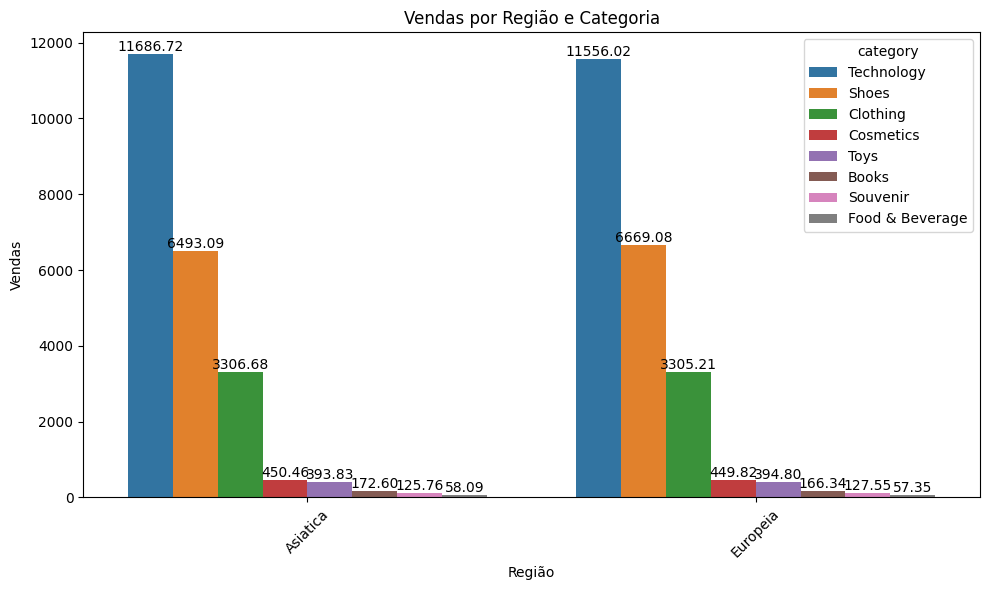

In [ ]:
# Agrupamos o DataFrame por "region" e "category"
grupo = df.groupby(['Regiao', 'category'])

# Calcular o ticket médio para cada categoria e região
ticket_medio = grupo['vendas'].mean()

# Transformar a série resultante em um DataFrame e ordenar em ordem decrescente de ticket médio
ticket_medio_df = ticket_medio.reset_index().sort_values(by=['Regiao', 'vendas'], ascending=[True, False])

# Selecionar a primeira e a última linha do DataFrame resultante para cada região, que terá o produto com o maior e menor ticket médio por região, respectivamente
maior_ticket_medio = ticket_medio_df.drop_duplicates(subset='Regiao', keep='first')
menor_ticket_medio = ticket_medio_df.drop_duplicates(subset='Regiao', keep='last')

# Imprimir o resultado
print("Produto com o maior ticket médio por região:")
print(maior_ticket_medio[['Regiao', 'category', 'vendas']])
print()
print("Produto com o menor ticket médio por região:")
print(menor_ticket_medio[['Regiao', 'category', 'vendas']])

df = ticket_medio_df

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Regiao', y='vendas', hue='category', data=df)
plt.xlabel('Região')
plt.ylabel('Vendas')
plt.title('Vendas por Região e Categoria')
plt.xticks(rotation=45)

# Adicionar os valores dos preços acima das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()

# Mostrar o gráfico
plt.show()

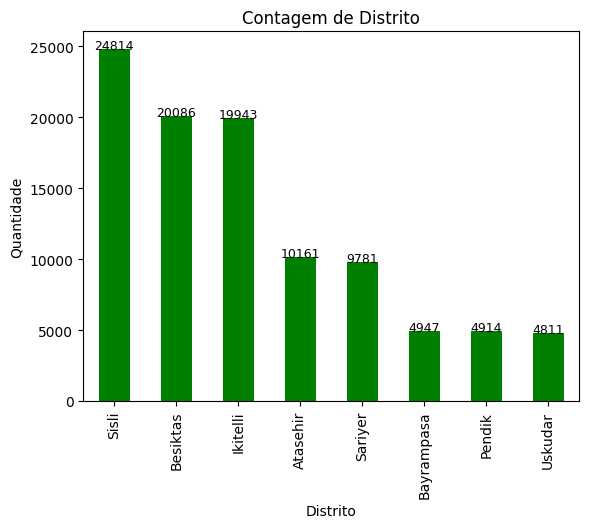

In [ ]:
#Criar o calculo de quantidade de Distrito
Distrito_qtd = df['Distrito'].value_counts()
Distrito_qtd.plot(kind='bar', color='green')

# Inserir titulo e nomes dos eixos X e Y
plt.xlabel('Distrito')
plt.ylabel('Quantidade')
plt.title('Contagem de Distrito')

# Inserir rótulos nas barras
for i, count in enumerate(Distrito_qtd):
    plt.text(i, count+10, str(count), ha='center', fontsize=9)

plt.show()

#<font color=green>CONCLUSÃO